# DS 862 - ASSIGNMENT 2
# AMOGH RANGANATHAIAH (aranganathaiah@sfsu.edu)
# EKTA SINGH (esingh@sfsu.edu)

For this assignment, we will use two different datasets: fashion MNIST, which we have used for assignment 1 already, and a the famous Lena image. We will explore the use of clustering in two different ways: 
1. Clustering as Data Exploration 
2. Image Compression

## 1. Clustering as data exploration
For this application we will use clustering to group similar clothing items together. The class we discussed some applications of image clustering, which include quicker recommendation retrievals. So this is a good application to practice clustering. Of course we are not building a recommendation system here; we will simply try some clustering algorithms and do some visualizations.

In [1]:
# Loading Data
import pandas as pd
data = pd.read_csv('fashion-mnist_train-1.csv')
data.head()
data.isnull().sum().sum()
data.drop_duplicates(inplace=True)
data.shape

(59957, 785)

In [2]:
X = data.drop('label',axis=1)
y = data['label']

#It is a large data set so use only 1500 observations to make your life easier.
X = X.iloc[:1500, :]
y = y.iloc[:1500]

In [3]:
y.nunique()

10

We will use <br>
a. **Hierarchical Clustering** <br>
b. **Gaussian Mixture Models** <br>
c. **DBScan** <br>
on this dataset. K-Means will be used in the next exercise.

For each of the three clustering algorithms, I want you to do the following: Extract the cluster averages and plot the cluster averages as images. Note that this is a 28 x 28 image. The steps you should take are as follows:
1. Perform clustering.
2. For each cluster: <br>
    a. Compute the mean of observations (or directly extract the cluster center). You should get a 786 x 1 array (or dataframe). <br>
    b. Convert that to an array of 28 x 28. Call this variable 'array'. <br>
    c. Display the image. <br>

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Hierarchical Clustering
**1. Agglomerative(bottom-up approach)** <br>
**2. Divisive(top-down approach)**

For this assignment, we are using Agglomerative Clustering.

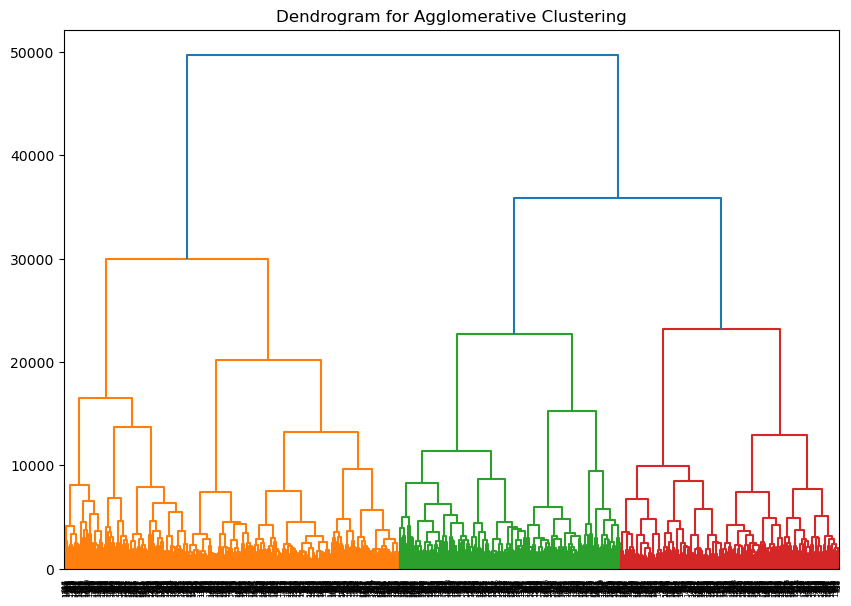

In [5]:
# First create a dendogram for the data set. How many clusters is suggested?
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering")
plt.show()

**How many clusters we should use?**

In this dendrogram, the largest vertical distance without crossing any horizontal lines appears between heights 20,000 and 40,000, right before the merge of the top-level blue lines into the two main clusters (orange and the other combined green/red). This suggests that a reasonable cut could be made at a height just above 20,000, which results in **4 clusters**.

In [6]:
# Run Agglomerative Clustering with the suggested number of clusters, and perform the plotting procedures mentioned above.

from sklearn.cluster import AgglomerativeClustering

# Running Agglomerative Clustering with 4 clusters
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
agg_clustering.fit(X)

# Get the cluster labels
labels = agg_clustering.labels_
print("Cluster labels:", labels)

Cluster labels: [3 3 2 ... 3 3 1]


In [7]:
import numpy as np

# Compute the mean of each cluster
cluster_means = []

for i in range(n_clusters):
    cluster_mean = X[labels == i].mean(axis=0)
    cluster_means.append(cluster_mean)

# Convert to a 786 x 1 array (list of arrays)
cluster_means_array = np.array(cluster_means)
# print("Cluster means shape:", cluster_means_array.shape)  # Should be (10, 784)

# Reshape each cluster mean into a 28x28 array and store in a list
cluster_images = [mean.reshape(28, 28) for mean in cluster_means_array]

# print("Cluster 1 reshaped to 28x28:", cluster_images[0].shape)  # Should be (28, 28)

Cluster means shape: (4, 784)
Cluster 1 reshaped to 28x28: (28, 28)


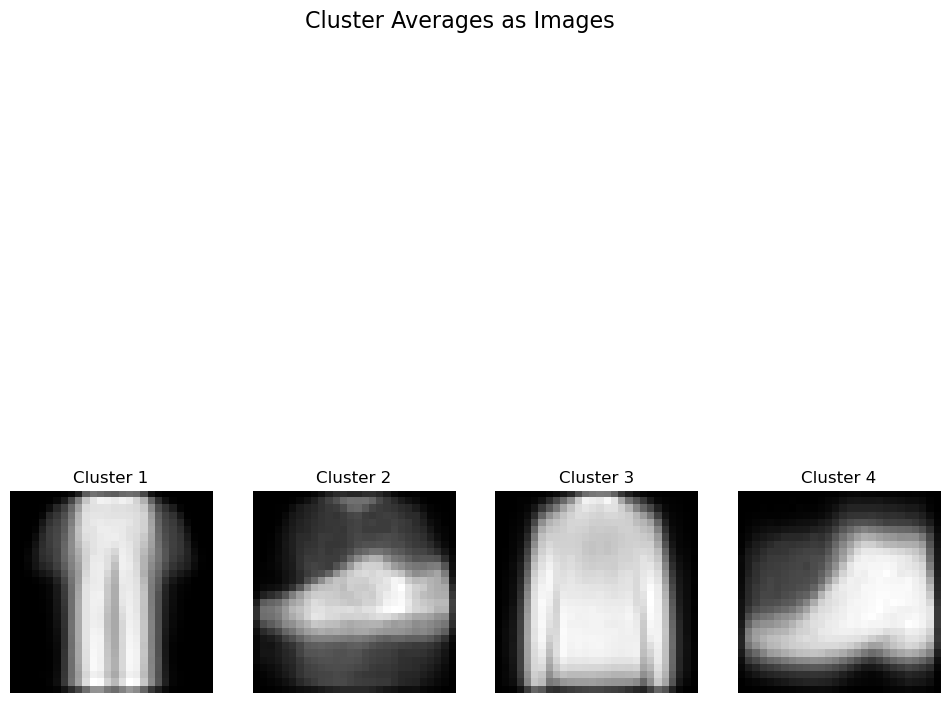

In [8]:
# Plot the cluster centers as images
### Note that for some algorithms you DO NOT need to calculate the average. You can directly extract the cluster centers.

# Sample Code
# f, axes = plt.subplots(nrows=2, ncols=2) # TODO: change nrows and ncols to fit the number of clusters. nrow x ncol should be smaller than nclusters.
# for i in range(4): # TODO: change the range number to fit the number of clusters
#     ax = axes.flat[i]
#     mask = AC.labels_ == i # TODO: change the variable name "AC" to the variable name you used for clustering
#     array = np.reshape(np.array(X[mask].mean()), (28, 28))
#     ax.imshow(array)
#     ax.set_title(i)

# Plotting the cluster averages as images
fig, axes = plt.subplots(1, n_clusters, figsize=(12, 12))

for i, ax in enumerate(axes):
    ax.imshow(cluster_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Cluster {i+1}")

plt.suptitle("Cluster Averages as Images", fontsize=16)
plt.show()

**General Observations:**
1. Cluster 1: This cluster looks like a T-shirt or pant. The general shape of the clothing with short sleeves and a relatively large, square-like body suggests this.

2. Cluster 2: This cluster appears to be footwear—possibly a sneaker or casual shoe. The curved shape and sole outline are indicative of footwear.

3. Cluster 3: This seems to represent a sweater or coat. The long sleeves and thicker, rectangular body point towards some kind of upper body clothing with long sleeves.

4. Cluster 4: Similar to Cluster 2, this looks like another type of footwear, but with a slightly different style. It could represent a boot or high-top shoe based on its more elevated shape compared to Cluster 2.

**Our Observations:**
1. The clusters are capturing broad categories of clothing, which is in line with the types of items in the Fashion MNIST dataset.
2. The cluster averages seem to be relatively distinct and visually interpretable, which suggests that the agglomerative clustering has successfully grouped similar clothing items together.
3. There’s a clear differentiation between types of tops and footwear, indicating that the dataset likely had strong enough features to distinguish these categories.

In [9]:
# Repeating the above procedure, but with 10 clusters instead.

from sklearn.cluster import AgglomerativeClustering

# Running Agglomerative Clustering with 10 clusters
n_clusters = 10
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
agg_clustering.fit(X)

# Get the cluster labels
labels = agg_clustering.labels_
print("Cluster labels:", labels)

Cluster labels: [7 4 5 ... 4 9 6]


In [10]:
import numpy as np

# Compute the mean of each cluster
cluster_means = []

for i in range(n_clusters):
    cluster_mean = X[labels == i].mean(axis=0)
    cluster_means.append(cluster_mean)

# Convert to a 786 x 1 array (list of arrays)
cluster_means_array = np.array(cluster_means)
print("Cluster means shape:", cluster_means_array.shape)  # Should be (10, 784)

# Reshape each cluster mean into a 28x28 array and store in a list
cluster_images = [mean.reshape(28, 28) for mean in cluster_means_array]

# Example: Display the shape of one cluster mean
print("Cluster 1 reshaped to 28x28:", cluster_images[0].shape)  # Should be (28, 28)

Cluster means shape: (10, 784)
Cluster 1 reshaped to 28x28: (28, 28)


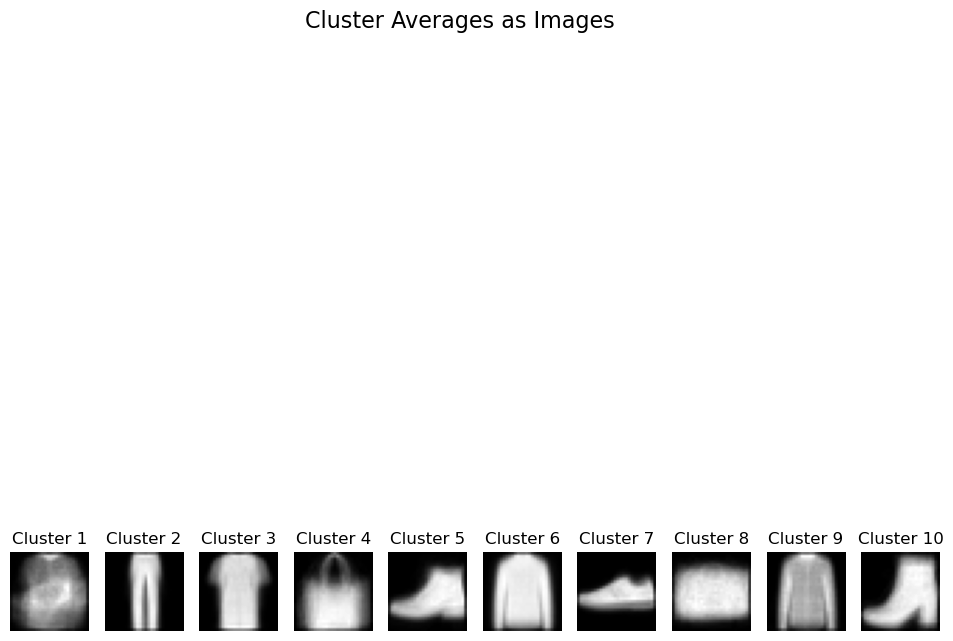

In [11]:
# Plotting the cluster averages as images
fig, axes = plt.subplots(1, n_clusters, figsize=(12, 12))

for i, ax in enumerate(axes):
    ax.imshow(cluster_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Cluster {i+1}")

plt.suptitle("Cluster Averages as Images", fontsize=16)
plt.show()

**General Observations:**
1. Cluster 1: This cluster resembles sneaker or shirt, but its not very clear.
2. Cluster 2: This clearly looks like pants or trousers.
3. Cluster 3: This resembles a T-shirt or short-sleeved top.
4. Cluster 4: This could represent a bag or accessory.
5. Cluster 5: This looks like boots or some form of high-top footwear.
6. Cluster 6: This cluster resembles a coat or sweater.
7. Cluster 7: Similar to Cluster 1, this looks like footwear, but it seems to be a casual sneaker.
8. Cluster 8: This appears to be some form of bag or rectangular accessory.
9. Cluster 9: This cluster seems to represent a coat.
10. Cluster 10: This clearly looks like boots.

**Our Observations:**
1. The clustering algorithm has done a good job of identifying distinct categories such as footwear, tops, pants, and accessories.
2. It’s interesting to note that it has identified accessories (possibly bags) as separate clusters, which shows the versatility of the algorithm in distinguishing between clothing items and other objects.
3. The distinction between different types of footwear (sneakers vs boots) is quite clear, indicating that the features in the data are helping the model make meaningful groupings.

In [12]:
# Computing the rand scores for the two clustering results above

from sklearn.metrics import rand_score

# For 4 clusters
agg_clustering_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels_4 = agg_clustering_4.fit_predict(X)

# Compute Rand Score for 4 clusters
rand_index_4 = rand_score(y[:1500], labels_4)
print(f"Rand Score for 4 clusters: {rand_index_4}")

# For 10 clusters
agg_clustering_10 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
labels_10 = agg_clustering_10.fit_predict(X)

# Compute Rand Score for 10 clusters
rand_index_10 = rand_score(y[:1500], labels_10)
print(f"Rand Score for 10 clusters: {rand_index_10}")

Rand Score for 4 clusters: 0.7694640871692239
Rand Score for 10 clusters: 0.8635196797865243


**Our Observations:**
1. The Rand score improves when increasing the number of clusters from 4 to 10, indicating that the 10-cluster configuration is a better fit for this dataset, which likely contains a greater number of distinct categories.

2. Higher granularity with 10 clusters: The 10-cluster configuration is likely capturing more detailed nuances between the different fashion items, leading to a higher agreement with the labeled data.

3. Balance between generalization and specificity: The 4-cluster result could be useful if you're interested in broader, more generalized categories (e.g., grouping all tops together, all shoes together), but the 10-cluster result offers better performance when looking to capture the finer distinctions between item types.

### Gaussian Mixture Model Clustering
Now repeat the above procedures (perform two separate clusterings, plots, and Rand scores compute). Note that to get the cluster center, you DO NOT need to compute the average of observations within the cluster. <br>
For GMM, you are **required** to directly extract the cluster centers for visualization.

In [13]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Run GMM clustering with 4 clusters
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(X)  # Assuming X is the dataset with 784 features (28x28 images flattened)

GaussianMixture(n_components=4, random_state=42)

In [14]:
# Step 2: Extract the cluster centers (mean of each component)
cluster_centers = gmm.means_

In [15]:
# Step 3: Convert the cluster centers to 28x28 arrays
cluster_images = [center.reshape(28, 28) for center in cluster_centers]

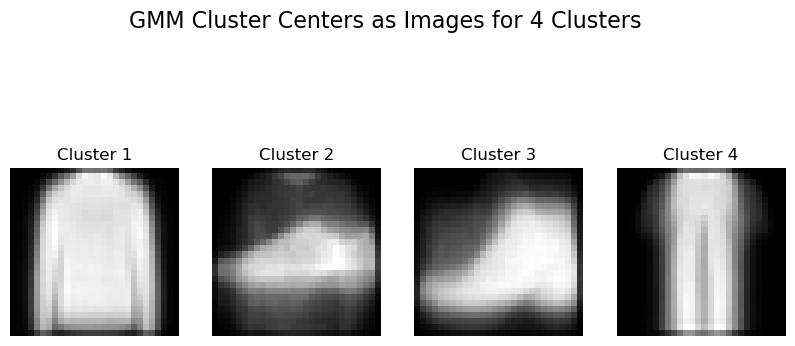

In [16]:
# Step 4: Plot the cluster centers as images
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

for i, ax in enumerate(axes):
    ax.imshow(cluster_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Cluster {i+1}")

plt.suptitle("GMM Cluster Centers as Images for 4 Clusters", fontsize=16)
plt.show()

**General Observations:**
1. Cluster Diversity: The GMM has grouped the dataset into 4 broad categories: tops, footwear (two distinct types), and pants.
2. Footwear Separation: It’s interesting that two clusters (Clusters 2 and 3) both correspond to footwear but represent distinct styles — one appears to capture sneakers or low-top shoes, while the other captures boots or high-top shoes. This shows that GMM is capable of capturing nuances in similar-looking items.
3. Clear Clothing Categories: The GMM clustering is quite successful in separating upper-body clothing (long-sleeved tops), lower-body clothing (pants), and footwear into distinct clusters.

**Our Observations:**
1. The Gaussian Mixture Model (GMM) clustering has grouped the dataset into 4 clusters, each corresponding to a distinct visual category in the dataset.
2. Each cluster represents a cluster center that resembles the average image of the items belonging to that cluster.

In [17]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Run GMM clustering with 10 clusters
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(X)  # Assuming X is the dataset with 784 features (28x28 images flattened)

GaussianMixture(n_components=10, random_state=42)

In [18]:
# Step 2: Extract the cluster centers (mean of each component)
cluster_centers = gmm.means_

In [19]:
# Step 3: Convert the cluster centers to 28x28 arrays
cluster_images = [center.reshape(28, 28) for center in cluster_centers]

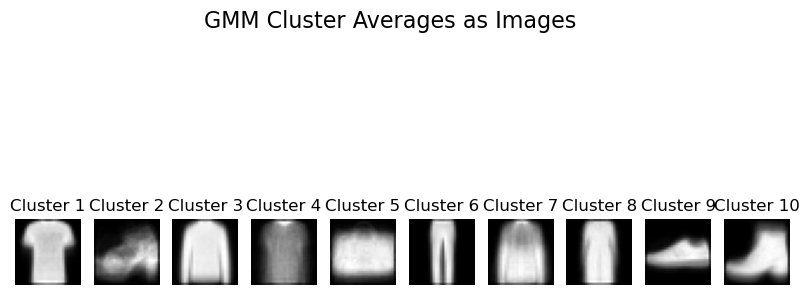

In [20]:
# Step 4: Plot the cluster averages as images
fig, axes = plt.subplots(1, 10, figsize=(10, 5))

for i, ax in enumerate(axes):
    ax.imshow(cluster_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Cluster {i+1}")

plt.suptitle("GMM Cluster Averages as Images", fontsize=16)
plt.show()

**General Observations:**

1. Cluster 1: This looks like a T-shirt or top. The short sleeves and square shape are evident, indicating a simple clothing item.
2. Cluster 2: This seems to represent footwear, possibly a sneaker or casual shoe. The curved shape with a thick sole suggests that it’s a shoe.
3. Cluster 3: This cluster appears to represent long-sleeved tops or coats. The elongated body and sleeves suggest a top with long sleeves.
4. Cluster 4: This cluster could represent some type of bag or accessory, given its less defined clothing shape, which is more square-like.
5. Cluster 5: This looks like a footwear item, possibly a low-top shoe or sneaker based on its elongated shape and defined outline of a sole.
6. Cluster 6: This cluster appears to represent pants or trousers. The vertical elongated shape with a clear separation at the bottom suggests legwear.
7. Cluster 7: Another possible footwear cluster, this one resembles a long boot or shoe, given its more defined and taller shape compared to other footwear clusters.
8. Cluster 8: This resembles a dress or long coat. The broad body and length suggest that it’s a full-body clothing item, possibly with sleeves.
9. Cluster 9: This looks like a sneaker or casual shoe, as the shape suggests a typical shoe with a well-defined sole.
10. Cluster 10: This seems to be a boot or high-top shoe, given its taller structure. The boot-like shape and elevated heel are more prominent in this cluster.

**Our Observations:**
1. The Gaussian Mixture Model (GMM) clustering has captured distinct patterns for different clothing items in the dataset. The cluster averages seem to represent different types of clothing and footwear in the Fashion MNIST dataset. There’s a clear separation of items into different types such as tops, trousers, shoes, etc.
2. The GMM clustering has successfully identified different categories of clothing items, including tops, footwear, pants, and possibly accessories.
3. GMM’s soft clustering nature might lead to some overlap in categories, particularly with similar items like different types of shoes or tops. The clusters vary in clarity; for example, Cluster 1 (T-shirt) and Cluster 6 (pants) are very distinct and easy to interpret, while Cluster 4 (possibly a bag) and Cluster 7 (boot-like shape) are a bit more ambiguous but still recognizable as different clothing categories.
4. Footwear clusters appear multiple times (Clusters 2, 5, 9, 10), showing that the dataset has several variations of shoes, and the GMM algorithm is able to capture these nuances.

In [21]:
from sklearn.metrics import rand_score

# Assuming X is your data and y are the true labels

# Step 1: Run GMM clustering for 4 clusters
gmm_4 = GaussianMixture(n_components=4, random_state=42)
labels_4 = gmm_4.fit_predict(X)

# Run GMM clustering for 10 clusters
gmm_10 = GaussianMixture(n_components=10, random_state=42)
labels_10 = gmm_10.fit_predict(X)

# Step 2: Compute Rand Score for both clustering results
rand_index_4 = rand_score(y, labels_4)
rand_index_10 = rand_score(y, labels_10)

# Print the Rand Scores
print(f'Rand Index for GMM with 4 clusters: {rand_index_4}')
print(f'Rand Index for GMM with 10 clusters: {rand_index_10}')

Rand Index for GMM with 4 clusters: 0.7592795196797866
Rand Index for GMM with 10 clusters: 0.8832199243940405


**Our Observations:**
1. Improvement with 10 Clusters: The significant improvement in the Rand Index from 0.759 (with 4 clusters) to 0.883 (with 10 clusters) indicates that the dataset contains more than 4 distinct categories, and using 10 clusters captures this complexity more accurately.
2. Fine-Grained Clustering: The GMM with 10 clusters is able to better capture fine-grained distinctions in the data, particularly between different styles or types of similar items (e.g., shoes, tops).
3. Trade-off: While 4 clusters provide a more generalized view of the data, 10 clusters provide a more detailed and nuanced clustering, which more closely reflects the true labels.

### DBScan Clustering
For DBScan, you may need to try at least 2 different combinations of epsilon and min_samples to get to the appropriate number of clusters. For epsilon, think about the scale of the data (print it out to see if needed) and think about what epsilon means. This will help you choose the appropriate range. <br>
Hint: the number is not small. <br>

You can use np.unique() to help you locate the unique number of clusters. <br>

Lastly, we will consider outliers as one cluster as well (even though they normally are not). <br>

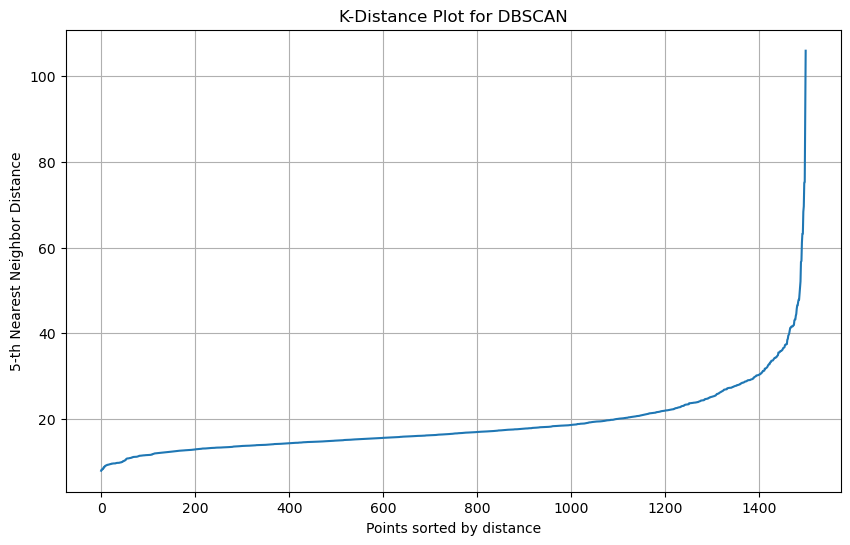

In [22]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Compute k-distances (k = min_samples)
min_samples = 5  # Define min_samples
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Step 2: Sort distances and plot
distances = np.sort(distances[:, min_samples - 1])  # Use the min_samples-th distance
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Plot for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()

DBSCAN with eps=1000: Number of clusters (excluding noise): 7
DBSCAN with eps=1010: Number of clusters (excluding noise): 8
DBSCAN with eps=1020: Number of clusters (excluding noise): 12
DBSCAN with eps=1030: Number of clusters (excluding noise): 12
DBSCAN with eps=1040: Number of clusters (excluding noise): 16
DBSCAN with eps=1050: Number of clusters (excluding noise): 13
DBSCAN with eps=1060: Number of clusters (excluding noise): 14
DBSCAN with eps=1070: Number of clusters (excluding noise): 13
DBSCAN with eps=1080: Number of clusters (excluding noise): 13
DBSCAN with eps=1090: Number of clusters (excluding noise): 12
DBSCAN with eps=1100: Number of clusters (excluding noise): 11
DBSCAN with eps=1110: Number of clusters (excluding noise): 9
DBSCAN with eps=1120: Number of clusters (excluding noise): 8
DBSCAN with eps=1130: Number of clusters (excluding noise): 9
DBSCAN with eps=1140: Number of clusters (excluding noise): 9


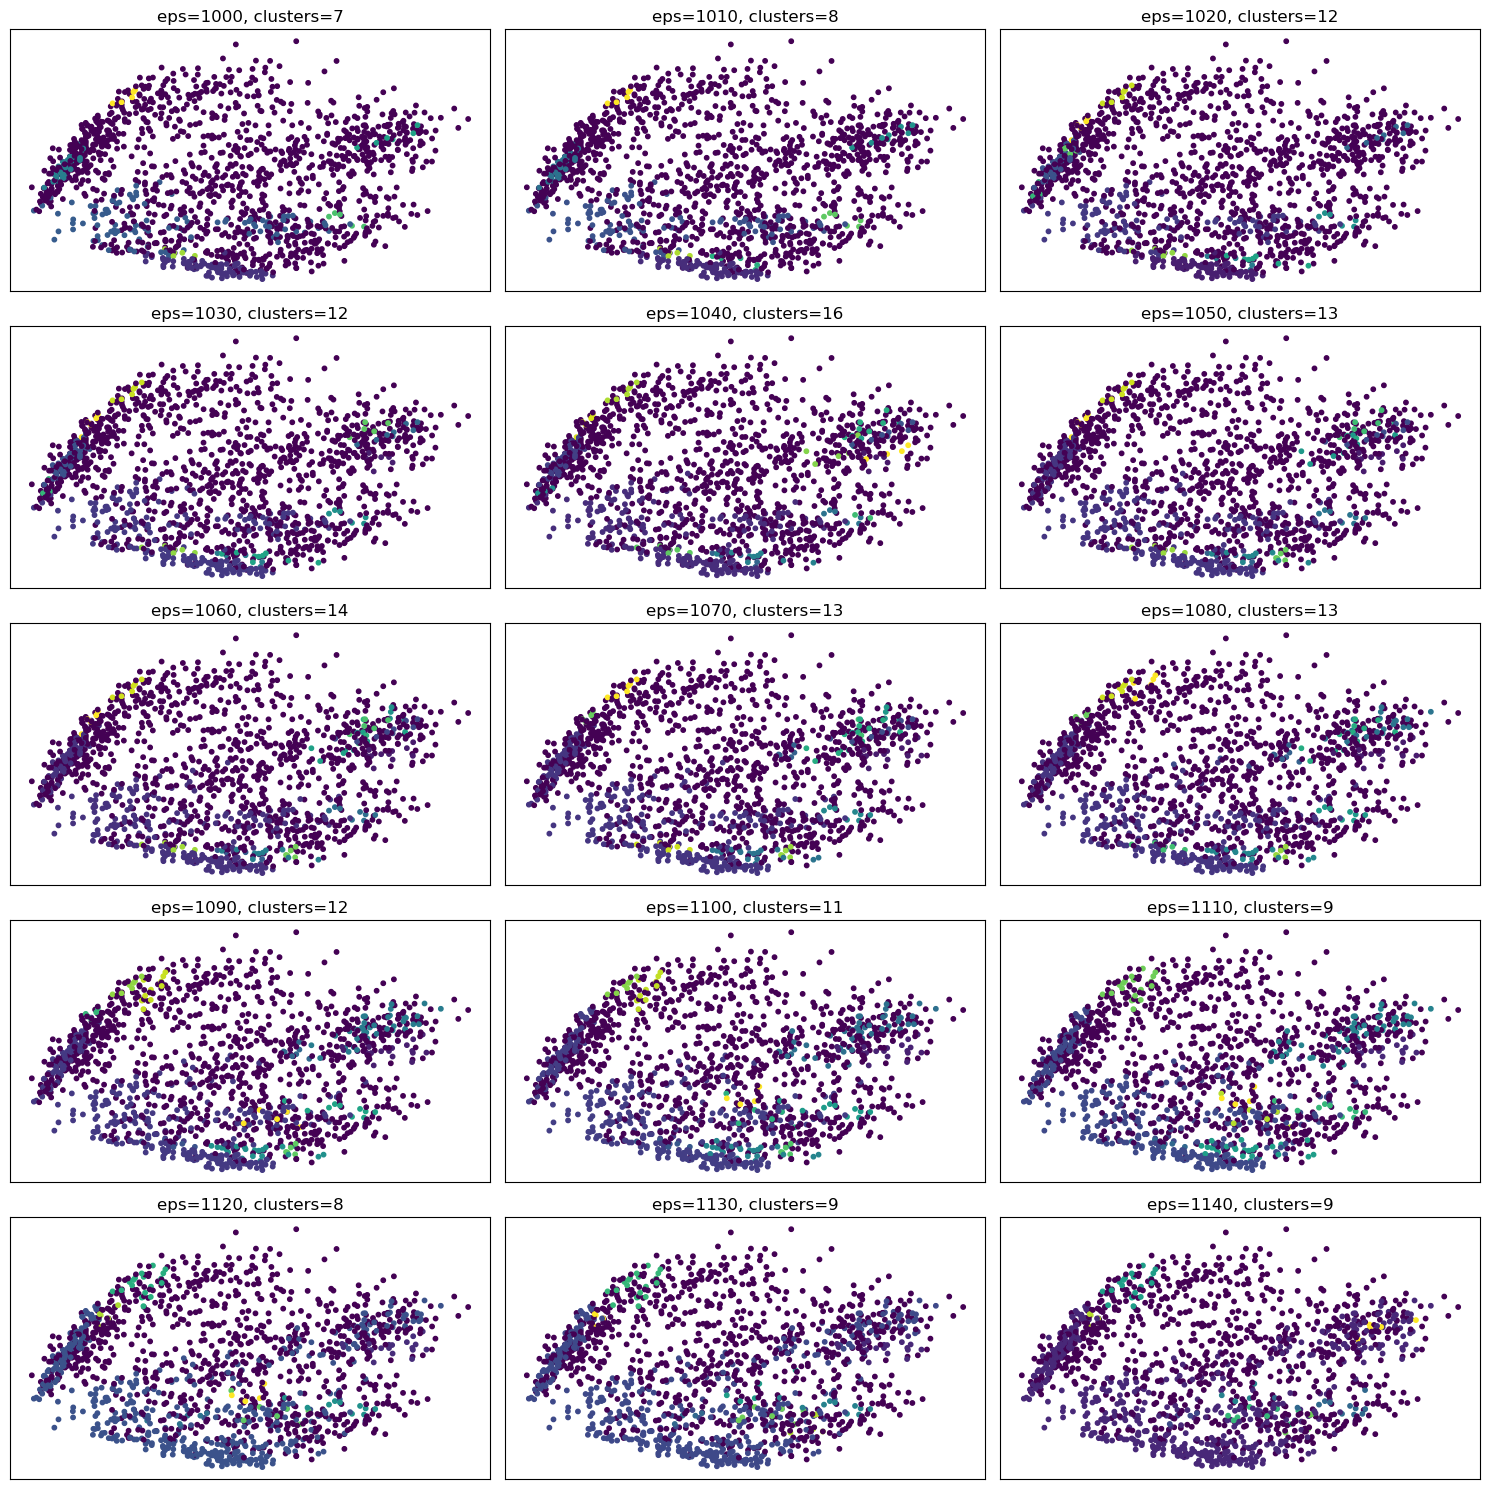

In [23]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set up the min_samples
min_samples = 5

# Apply PCA for visualization in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Iterate over eps values from 1000 to 1150 with an increment of 10
eps_values = np.arange(1000, 1141, 10)
n_clusters_list = []

plt.figure(figsize=(15, 15))

for i, eps in enumerate(eps_values):
    # Run DBSCAN for the current eps
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Check unique clusters (including noise, labeled as -1)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise
    n_clusters_list.append(n_clusters)
    print(f"DBSCAN with eps={eps}: Number of clusters (excluding noise): {n_clusters}")
    
    # Plotting the results of DBSCAN
    plt.subplot(5, 3, i+1)  # Update subplot grid to accommodate more plots (5 rows now)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"eps={eps}, clusters={n_clusters}")
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

# # Optional: Print out the number of clusters for each eps value
# for eps, n_clusters in zip(eps_values, n_clusters_list):
#     print(f"eps={eps}: Number of clusters = {n_clusters}")

Epsilon=1100 seems to be the best choice, as it gives exactly 11 clusters (10 meaningful clusters + 1 for outliers), which matches our requirement. Now, we use eps=1100 for your final DBSCAN clustering and to proceed with our analysis, considering outliers as their own cluster. <br>
The closest one to this is epsilon = 1090 with number of clusters = 12. Hence, we will be calculating the rand score for the following scenarios: <br>
eps=1100 and eps = 1090

In [24]:
from sklearn.metrics import rand_score

# Run DBSCAN for eps=1090
dbscan_1090 = DBSCAN(eps=1090, min_samples=min_samples)
labels_1090 = dbscan_1090.fit_predict(X)

# Run DBSCAN for eps=1100
dbscan_1100 = DBSCAN(eps=1100, min_samples=min_samples)
labels_1100 = dbscan_1100.fit_predict(X)

# Compute Rand Score for eps=1090
rand_index_1090 = rand_score(y, labels_1090)
print(f'Rand Index for DBSCAN with eps=1090: {rand_index_1090}')

# Compute Rand Score for eps=1100
rand_index_1100 = rand_score(y, labels_1100)
print(f'Rand Index for DBSCAN with eps=1100: {rand_index_1100}')

# Mean of the Rand Index results
mean_rand_index = np.mean([rand_index_1090, rand_index_1100])
print(f'Mean Rand Index for eps=1090 and eps=1100: {mean_rand_index}')

Rand Index for DBSCAN with eps=1090: 0.5134080498109851
Rand Index for DBSCAN with eps=1100: 0.5308294418501223
Mean Rand Index for eps=1090 and eps=1100: 0.5221187458305536


**Observations:**
1. Rand Index for eps=1090: The Rand Index is 0.513, which indicates a moderate agreement between the ground truth labels and the clusters formed by DBSCAN. This score suggests that the clustering is capturing some structure in the data, but there's still a considerable amount of disagreement (i.e., points being placed in different clusters than they should be).

2. Rand Index for eps=1100: The Rand Index is slightly higher at 0.531, which indicates a slightly better clustering performance compared to eps=1090. This suggests that increasing eps to 1100 improves the alignment of the clusters with the true labels, but the improvement is incremental.

3. Mean Rand Index (0.522): The mean Rand Index of 0.522 for both eps=1090 and eps=1100 shows that the clustering performance is fairly consistent between these two epsilon values. The score falls in the range of moderate clustering quality but is far from optimal, which indicates that DBSCAN is able to capture some patterns in the data but may not be fully aligned with the underlying true categories.

**Overall Observations:**

1. Both Rand Index scores (around 0.51 and 0.53) indicate that the clusters are only partially aligned with the true labels. 

2. The increase in Rand Index from eps=1090 to eps=1100 suggests that slightly increasing the neighborhood size allows DBSCAN to form clusters that better reflect the true structure of the data.

3. The moderate Rand Index results indicate that while DBSCAN is capturing some meaningful clusters, it may still classify certain data points incorrectly, likely due to the inherent difficulty of the dataset or limitations of the DBSCAN algorithm when applied to this dataset.

4. In conclusion, DBSCAN clustering approach is moderately effective, but exploring alternative algorithms could lead to better alignment with the ground truth.

## 2. Image Compression using K-Means
Another application of clustering is image compression, which is also known as color quantization. In simple words, the idea is to represent an image using a fewer number of colors (hence achieving a compression). Part of this exercise is taken from [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

An image is essentially a bunch of pixels grouped together. A pixel ranges from 0 - 255, where 0 presents dark and 255 white. For colored images, it can be presented as a 3D array of dimension m x n x 3, where the 3 dimensions represent RGB colors. 

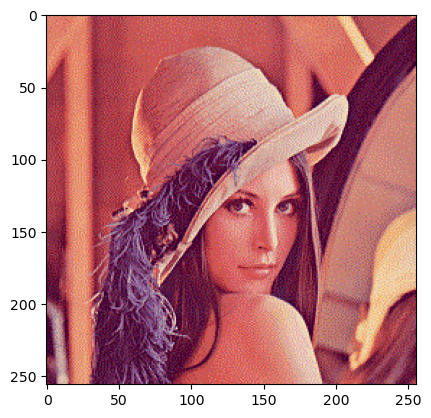

In [25]:
# Let's load the image
from matplotlib.image import imread
img = imread('lena_color.gif')
plt.imshow(img)
plt.show()

In [26]:
# This is the image size
img_size = img.shape
img_size

(256, 256, 4)

The image has dimension 256 x 256 x 4. Think of it as a matrix with 4 layers, where each layer is of dimension 256 x 256. If you explore the image, you will see it consists of many random values.

In [27]:
print(img)

[[[204 128 102 255]
  [255 128 153 255]
  [204 128 102 255]
  ...
  [204 128 153 255]
  [255 170 102 255]
  [204  85 102 255]]

 [[204 128 102 255]
  [255 128 153 255]
  [204 128 102 255]
  ...
  [255 170 102 255]
  [204 128 153 255]
  [204 128 102 255]]

 [[255 128 153 255]
  [204 128 102 255]
  [204 128 102 255]
  ...
  [255 128 153 255]
  [204 128 102 255]
  [204  85  51 255]]

 ...

 [[102   0  51 255]
  [ 51  43  51 255]
  [102   0  51 255]
  ...
  [153  85 102 255]
  [153  43  51 255]
  [153  85  51 255]]

 [[ 51  43  51 255]
  [102   0  51 255]
  [102   0  51 255]
  ...
  [153  43  51 255]
  [204  85 102 255]
  [153  43  51 255]]

 [[102   0  51 255]
  [102  43 102 255]
  [102  43  51 255]
  ...
  [153  43 102 255]
  [153  85  51 255]
  [204  85 102 255]]]


In [28]:
# Each row is a pixel on the image. The goal here is to group similar pixels by replace it with the cluster mean. 
# We will use KMeans to achieve this.

# First reshape it to be 2-dimensional
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print(X.shape)

(65536, 4)


In [29]:
# Here is your first task. Run K-Means on this reshaped data set with 10 clusters. 
# Name your model ***compressed***.

# Import necessary libraries
from sklearn.cluster import KMeans
import numpy as np

# Set number of clusters
k = 10

# Run K-means clustering on the pixel values (X)
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster centers (these are the RGB values of the 10 colors)
cluster_centers = kmeans.cluster_centers_

# Get the labels for each pixel
labels = kmeans.labels_

# Replace each pixel by the center of its cluster
compressed = cluster_centers[labels]
compressed = np.clip(compressed.astype('uint8'), 0, 255)

# Reshape the compressed image back to the original image size
compressed = compressed.reshape(img_size)

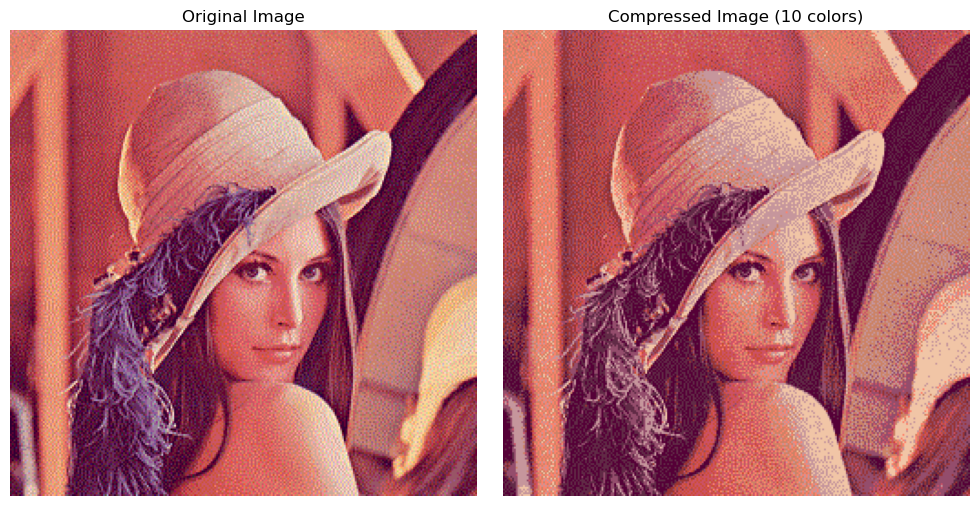

In [30]:
# Now let's plot the original image and the compressed image, and compare the difference.

import matplotlib.pyplot as plt

# Plot original image and compressed image side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Display the compressed image
ax[1].imshow(compressed)
ax[1].set_title('Compressed Image (10 colors)')
ax[1].axis('off')

# Show both images
plt.tight_layout()
plt.show()

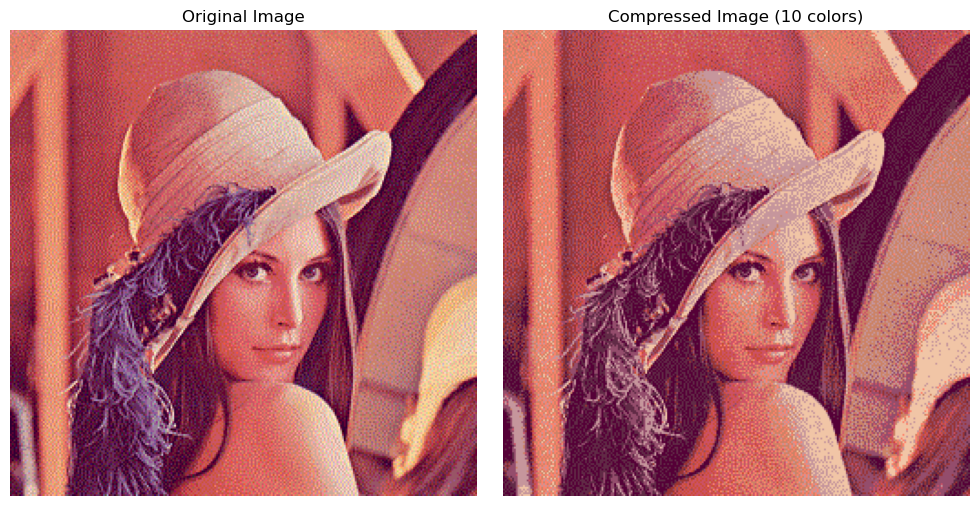

In [31]:
# Use the centroids to compress the image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.image import imread

# Load the image
img = imread('lena_color.gif')

# Get the image size
img_size = img.shape

# Reshape the image into a 2D array of pixels (each pixel is an RGB triplet)
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run K-means with 10 clusters
k = 10
kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Get the labels for each pixel (which cluster each pixel belongs to)
labels = kmeans.labels_

# Replace each pixel with its corresponding centroid
compressed_img = centroids[labels]
compressed_img = np.clip(compressed_img.astype('uint8'), 0, 255)

# Reshape the compressed image back to the original shape
compressed_img = compressed_img.reshape(img_size)

# Display the original and compressed images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show compressed image
ax[1].imshow(compressed_img)
ax[1].set_title('Compressed Image (10 colors)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

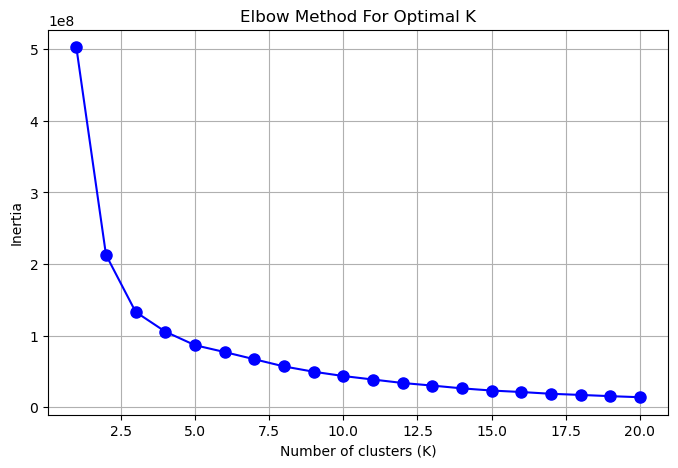

In [32]:
# Finding best K value using inertia(elbow method)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a range of K values to test
K_values = range(1, 21)  # You can adjust the upper limit of K
inertias = []

# Loop over the range of K values and store the inertia for each K
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

# Plot the inertia values for each K to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

The "elbow" typically occurs at the point where the decrease in inertia slows down significantly. In this case, it seems that after K=4, the inertia begins to level off, indicating diminishing returns on increasing the number of clusters. Thus, the optimal value of K based on the elbow method appears to be 4.

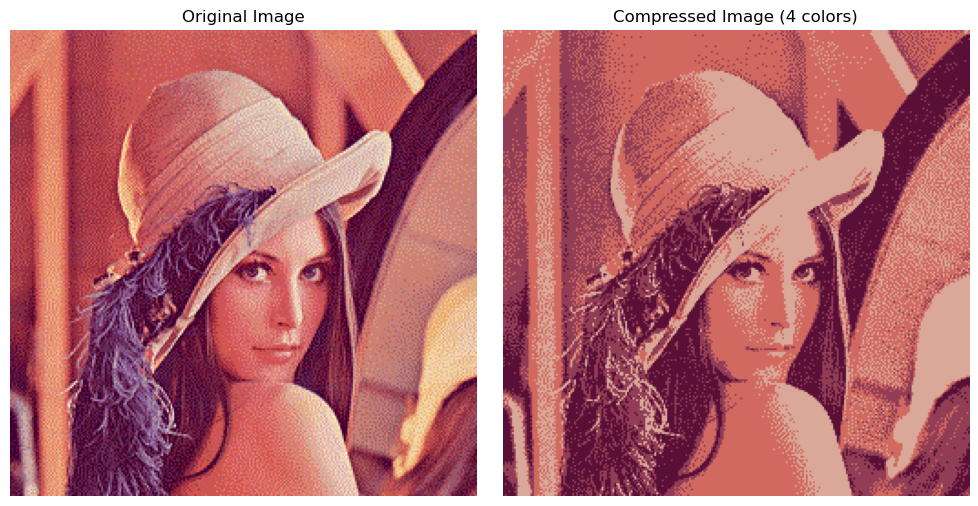

In [33]:
# Use the optimal K value of 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(X)

# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Get the labels for each pixel
labels = kmeans.labels_

# Replace each pixel with its corresponding centroid
compressed_img = centroids[labels]
compressed_img = np.clip(compressed_img.astype('uint8'), 0, 255)

# Reshape the compressed image back to the original shape
compressed_img = compressed_img.reshape(img_size)

# Display the original and compressed images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Show compressed image with optimal K
ax[1].imshow(compressed_img)
ax[1].set_title(f'Compressed Image ({optimal_k} colors)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

**General Observations:**
1. The inertia plot suggested that K=4 was a good candidate for the optimal number of clusters based on the elbow method.
2. As the number of clusters K decreases, the compression becomes stronger, but the visual quality degrades proportionally.
3. K=10 provides a balance between reasonable image quality and compression, whereas K=4 introduces significant artifacts but achieves higher compression.
4. Depending on the specific use case (storage requirements, visual quality, etc.), K=10 may offer a better balance for most applications, while K=4 is more suitable for applications where extreme compression is needed and quality is less important.

**Our Observation:**
1. The K-means clustering approach allows for controlled trade-offs between image quality and compression. Higher values of K preserve more detail but at the cost of using more colors, while lower K values offer higher compression with greater quality loss.